<a href="https://colab.research.google.com/github/DABURAcreate/BICT332/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

# Lab 3

# Exercise: 1

## Task 1

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution in training set:", np.bincount(y_train))


Class distribution in training set: [35 35 35]


## Task 2

In [48]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=200, noise=0.3, random_state=1)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
sc_m.fit(X_train_m)
X_train_m_std = sc_m.transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)

X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

print("Class distribution in moons training set:", np.bincount(y_train_m))

Class distribution in moons training set: [73 67]


# Exercise 2

## Task 1

Iris Dataset - eta0=0.01 -> Accuracy: 0.96


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


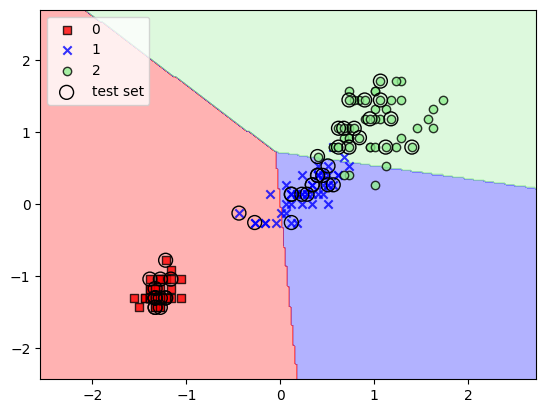

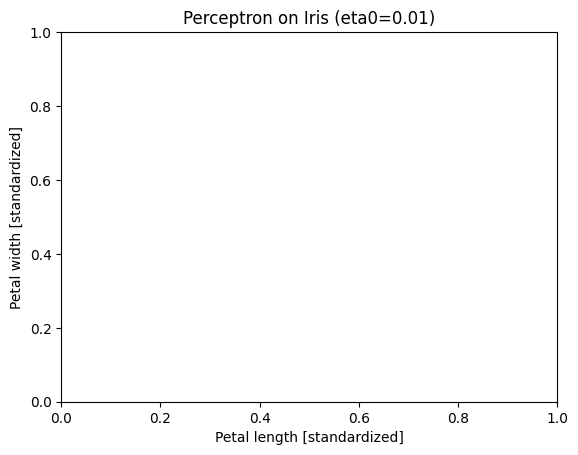

Iris Dataset - eta0=0.1 -> Accuracy: 0.98


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


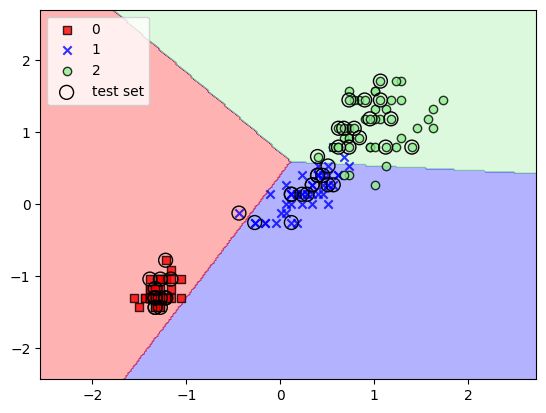

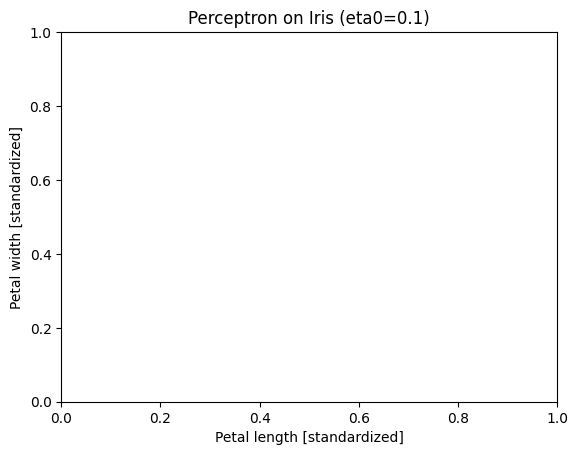

Iris Dataset - eta0=1 -> Accuracy: 0.89


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


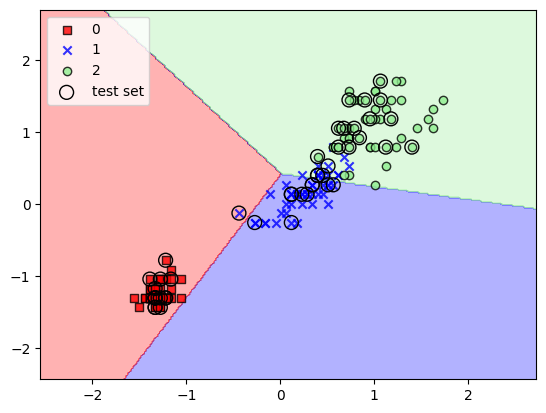

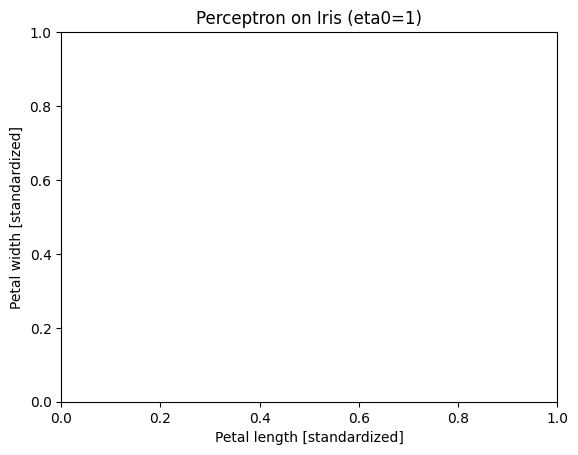

In [53]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

etas = [0.01, 0.1, 1]

for eta in etas:
    ppn = Perceptron(max_iter=40, eta0=eta, random_state=1)
    ppn.fit(X_train_std, y_train)

    y_pred = ppn.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    print(f'Iris Dataset - eta0={eta} -> Accuracy: {acc:.2f}')

    plot_decision_regions(X_combined_std, y_combined, classifier=ppn,
                          test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Perceptron on Iris (eta0={eta})')
    plt.show()

## Task 2

Moons Dataset - eta0=0.01 -> Accuracy: 0.67


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


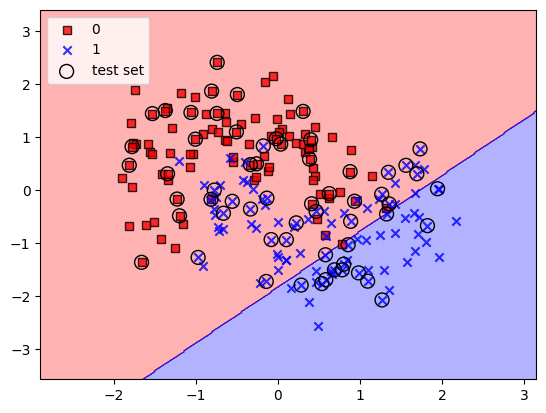

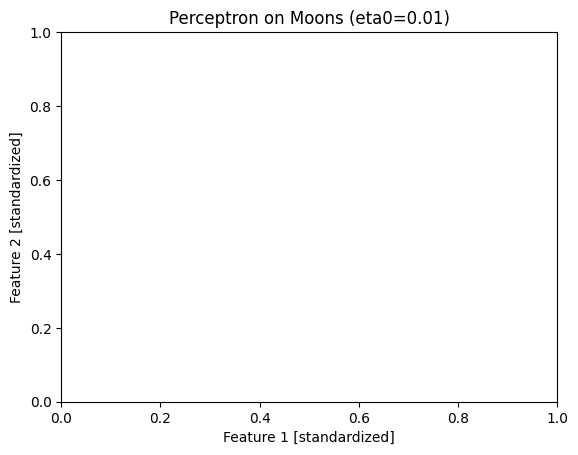

Moons Dataset - eta0=0.1 -> Accuracy: 0.85


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


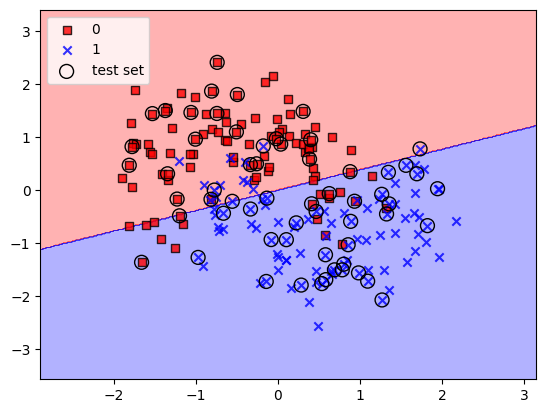

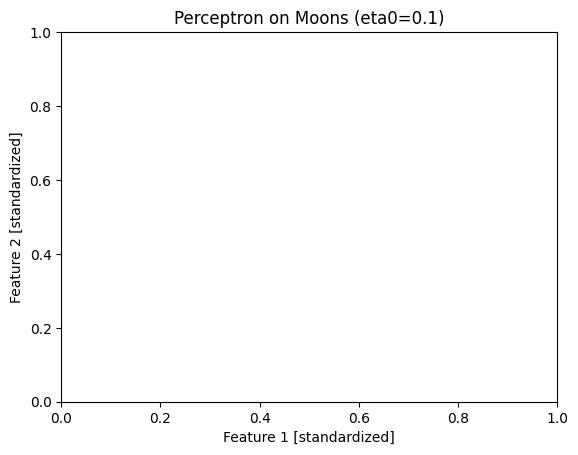

Moons Dataset - eta0=1 -> Accuracy: 0.85


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


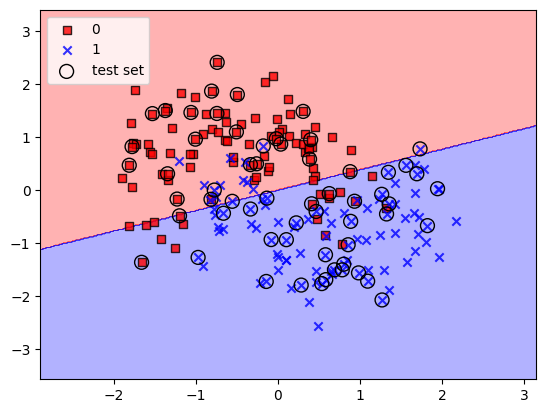

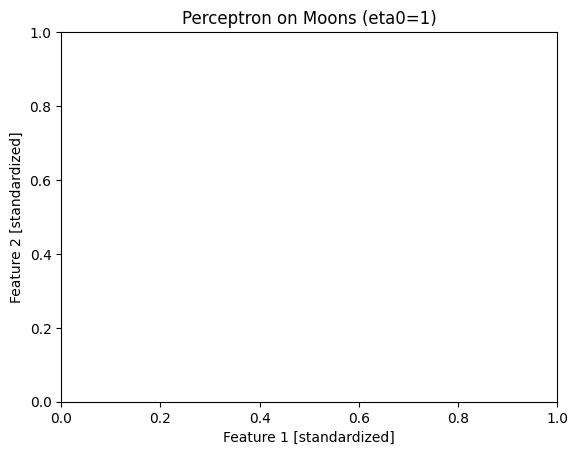

In [54]:
for eta in etas:
    ppn_m = Perceptron(max_iter=40, eta0=eta, random_state=1)
    ppn_m.fit(X_train_m_std, y_train_m)

    y_pred_m = ppn_m.predict(X_test_m_std)
    acc_m = accuracy_score(y_test_m, y_pred_m)
    print(f'Moons Dataset - eta0={eta} -> Accuracy: {acc_m:.2f}')

    plot_decision_regions(X_combined_m_std, y_combined_m, classifier=ppn_m,
                          test_idx=range(len(X_train_m), len(X_combined_m_std)))
    plt.xlabel('Feature 1 [standardized]')
    plt.ylabel('Feature 2 [standardized]')
    plt.title(f'Perceptron on Moons (eta0={eta})')
    plt.show()


Why it fails: because the data is not linearly separable, and the perceptron is restricted to linear decision surfaces.

# Exercise 3

## Task 1

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Logistic Regression (C=0.01) -> Accuracy: 0.69
Example predicted probabilities: [[0.18415623 0.35370809 0.46213568]
 [0.48146488 0.30637586 0.21215926]
 [0.50097506 0.30080668 0.19821826]]


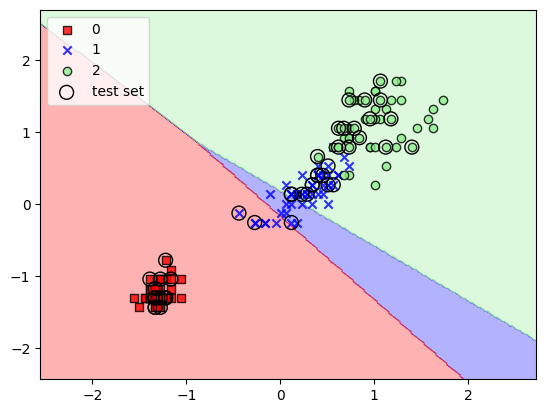

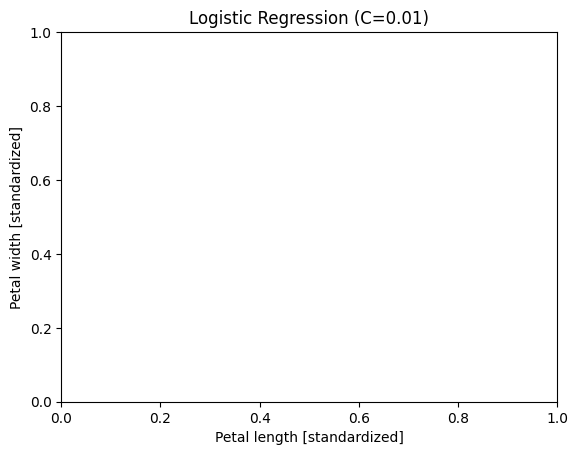

Logistic Regression (C=1) -> Accuracy: 0.98
Example predicted probabilities: [[4.35424381e-04 2.40133856e-01 7.59430720e-01]
 [7.98498914e-01 2.01272655e-01 2.28430822e-04]
 [8.15960440e-01 1.83929887e-01 1.09672897e-04]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


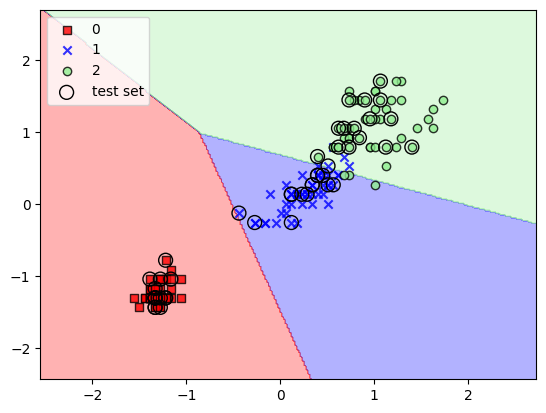

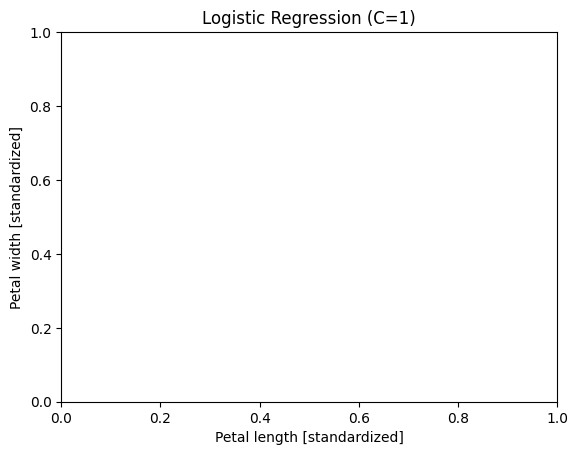

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Logistic Regression (C=100) -> Accuracy: 0.98
Example predicted probabilities: [[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]


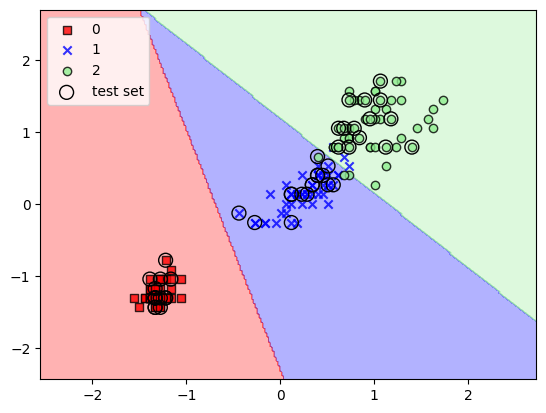

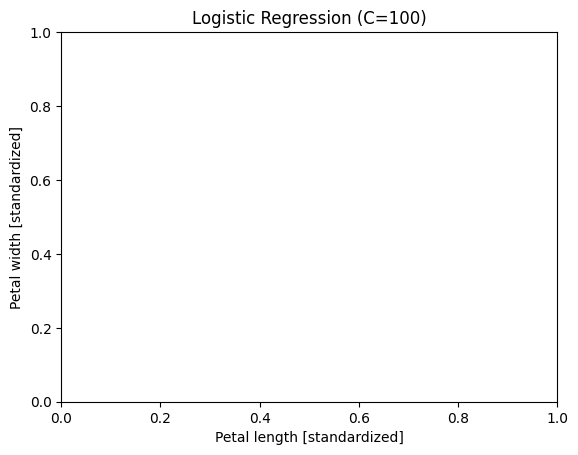

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Cs = [0.01, 1, 100]

for c in Cs:
    lr = LogisticRegression(C=c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)

    y_pred = lr.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)

    print(f'Logistic Regression (C={c}) -> Accuracy: {acc:.2f}')
    print("Example predicted probabilities:", lr.predict_proba(X_test_std[:3]))

    plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                          test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Logistic Regression (C={c})')
    plt.show()


Discussion:
The Logistic Regression code tests C = 0.01, 1, 100 on the Iris dataset to classify flowers using petal length and width. Underfitting happens with C=0.01 (high regularization), making the model too simple, with low accuracy and a smooth decision boundary in plot_decision_regions that misclassifies many points, especially where Versicolor and Virginica overlap. Overfitting may occur with C=100 (low regularization), where the model fits training data too closely, showing a jagged boundary and possible test errors. C=1 usually balances fit, giving high accuracy (e.g., 0.90–0.98) and a well-placed boundary. Check predict_proba for low-confidence probabilities (underfitting, C=0.01) or overconfident ones with errors (overfitting, C=100). Compare training vs. test accuracy to confirm: a big gap for C=100 suggests overfitting.

## Task 2

In [71]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, eta=0.1, n_iter=1000, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = float(0)

        for _ in range(self.n_iter):
            net_input = np.dot(X, self.w_) + self.b_
            output = self.sigmoid(net_input)
            errors = y - output

            # update weights
            self.w_ += self.eta * X.T.dot(errors)
            self.b_ += self.eta * errors.sum()
        return self

    def predict(self, X):
        net_input = np.dot(X, self.w_) + self.b_
        return np.where(self.sigmoid(net_input) >= 0.5, 1, 0)

# Select only classes 0 and 1 (Setosa vs Versicolor)
binary_mask = y < 2
X_bin = X_train_std[binary_mask[:len(X_train_std)]]
y_bin = y_train[binary_mask[:len(y_train)]]

# Train custom logistic regression
lr_scratch = LogisticRegressionScratch(eta=0.1, n_iter=2000)
lr_scratch.fit(X_bin, y_bin)

y_pred_scratch = lr_scratch.predict(X_bin)
print("Scratch Logistic Regression Accuracy:", (y_pred_scratch == y_bin).mean())



Scratch Logistic Regression Accuracy: 0.65


/tmp/ipython-input-3503179296.py:10: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


# Exercise 4

## Task 1

SVM (linear, C=1.0) -> Accuracy: 0.98


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


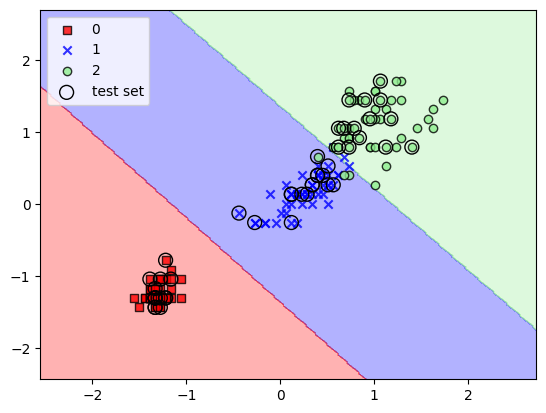

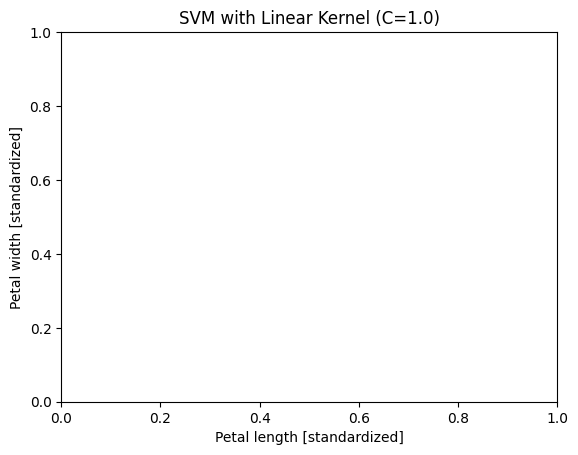

SVM (linear, C=100.0) -> Accuracy: 0.98


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


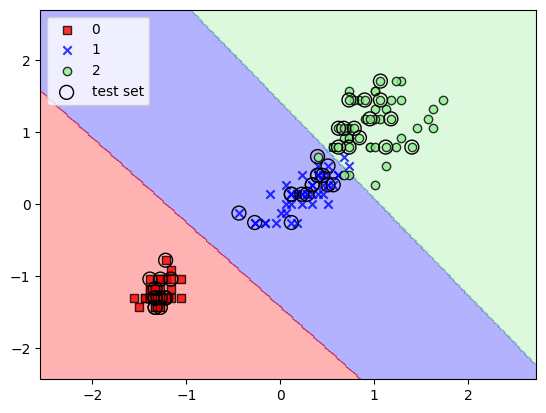

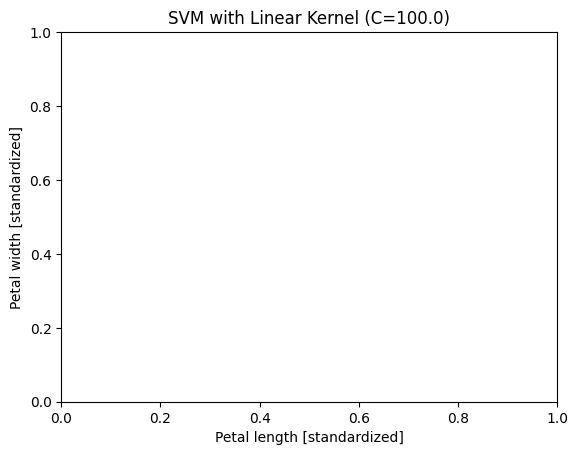

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Cs = [1.0, 100.0]

for c in Cs:
    svm = SVC(kernel='linear', C=c, random_state=1)
    svm.fit(X_train_std, y_train)

    y_pred = svm.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)

    print(f"SVM (linear, C={c}) -> Accuracy: {acc:.2f}")

    plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                          test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'SVM with Linear Kernel (C={c})')
    plt.show()


Discussion: The SVM code trains a linear Support Vector Machine on the Iris dataset with C = 1.0 and 100.0. The parameter C controls the margin size. A smaller C=1.0 creates a larger margin, allowing some misclassifications, which may underfit, showing a wider boundary in plot_decision_regions with lower accuracy (e.g., <0.90). A larger C=100.0 enforces a smaller margin, fitting training data closely, risking overfitting with a tighter boundary and higher accuracy (e.g., 0.90–0.98), but possible test errors. Check accuracy: low for C=1.0 suggests underfitting; a drop for C=100.0 indicates overfitting. Add print(accuracy_score(y_train, svm.predict(X_train_std))) to confirm overfitting if training accuracy is much higher than test

## Task 2

In [59]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

print("Number of support vectors for each class:", svm.n_support_)
print("Support vectors (first 5 shown):\n", svm.support_vectors_[:5])


Number of support vectors for each class: [ 2 13 11]
Support vectors (first 5 shown):
 [[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.39625036  0.3970548 ]
 [ 0.50779537  0.2659518 ]]


# Exercise 5

## Task 1

Gamma=0.01 → Accuracy: 0.80


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


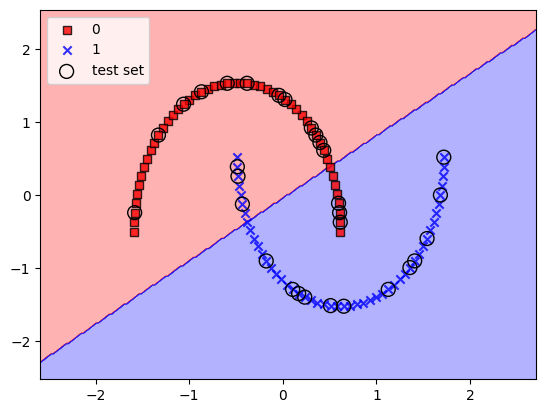

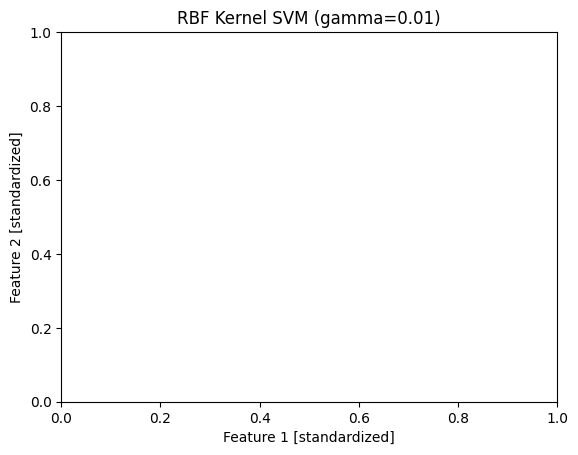

Gamma=1 → Accuracy: 1.00


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


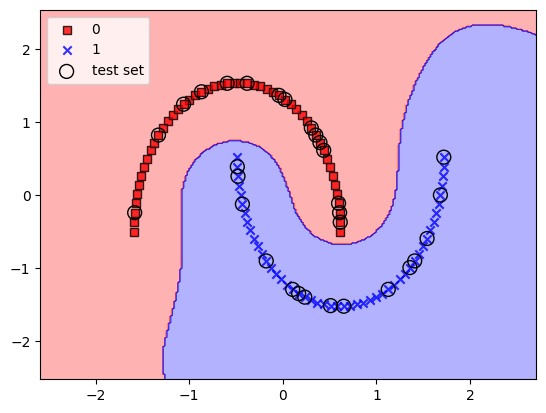

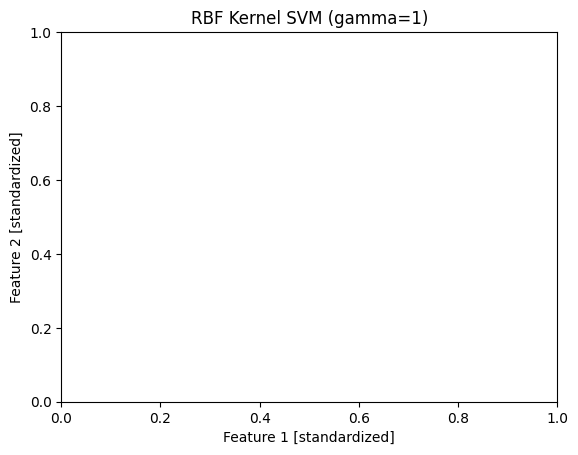

Gamma=100 → Accuracy: 0.93


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


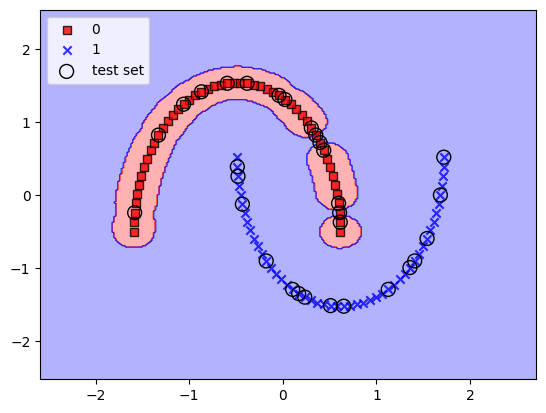

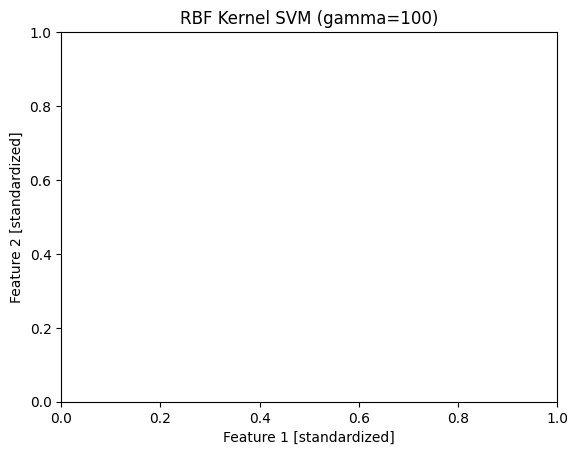

In [60]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Dataset
X_moons, y_moons = make_moons(n_samples=100, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1)

# Standardize
sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

gammas = [0.01, 1, 100]

for g in gammas:
    svm_rbf = SVC(kernel='rbf', random_state=1, gamma=g, C=1.0)
    svm_rbf.fit(X_train_m_std, y_train_m)

    y_pred_m = svm_rbf.predict(X_test_m_std)
    acc = accuracy_score(y_test_m, y_pred_m)
    print(f"Gamma={g} → Accuracy: {acc:.2f}")

    # Plot
    plot_decision_regions(X_combined_m_std, y_combined_m,
                          classifier=svm_rbf,
                          test_idx=range(len(X_train_m), len(X_combined_m_std)))
    plt.xlabel('Feature 1 [standardized]')
    plt.ylabel('Feature 2 [standardized]')
    plt.title(f"RBF Kernel SVM (gamma={g})")
    plt.show()


Discussion: The SVM code trains a linear SVM on the Iris dataset with C=1.0. To observe overfitting, check svm.n_support_: more support vectors suggest underfitting with a larger margin, leading to a simple boundary in plot_decision_regions that may misclassify points (e.g., Versicolor vs. Virginica), with lower accuracy (e.g., <0.90). Overfitting is unlikely with C=1.0, but a tight boundary with high training accuracy and lower test accuracy (add print(accuracy_score(y_test, svm.predict(X_test_std)))) indicates overfitting. Fewer support vectors hint at a tighter fit. Compare training vs. test accuracy: a large gap confirms overfitting. Check svm.support_vectors_[:5]; many near class overlaps suggest underfitting.

## Task 2

Linear SVM Accuracy: 0.9777777777777777
RBF SVM Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


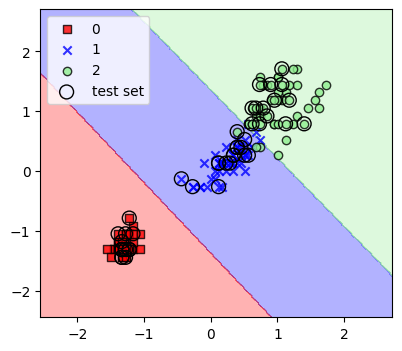

/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


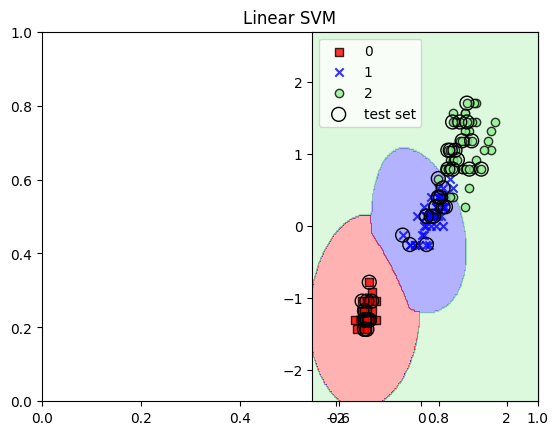

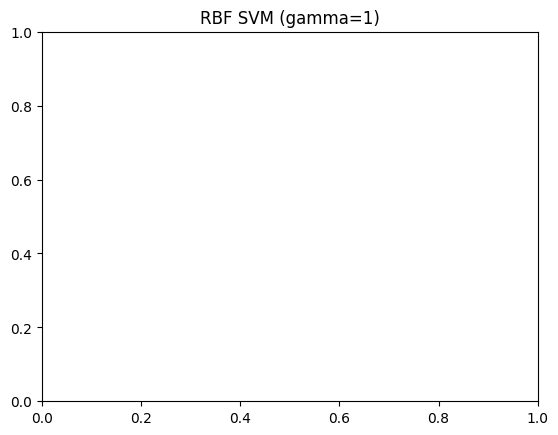

In [61]:
from sklearn import datasets

# Load Iris
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # petal length & width
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=1)
svm_linear.fit(X_train_std, y_train)
print("Linear SVM Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test_std)))

# Kernel (RBF) SVM
svm_rbf_iris = SVC(kernel='rbf', gamma=1.0, C=1.0, random_state=1)
svm_rbf_iris.fit(X_train_std, y_train)
print("RBF SVM Accuracy:", accuracy_score(y_test, svm_rbf_iris.predict(X_test_std)))

# Plots
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plot_decision_regions(X_combined_std, y_combined, classifier=svm_linear,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.title("Linear SVM")

plt.subplot(1,2,2)
plot_decision_regions(X_combined_std, y_combined, classifier=svm_rbf_iris,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.title("RBF SVM (gamma=1)")

plt.show()


# Exercise 6

## Task 1

In [62]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from pydotplus import graph_from_dot_data

# Loop over different max_depth values
for depth in range(1, 11):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"max_depth={depth}, Accuracy={acc:.3f}")

    # Export tree for visualization (optional)
    dot_data = export_graphviz(tree, filled=True, rounded=True,
                               class_names=['Setosa', 'Versicolor', 'Virginica'],
                               feature_names=['petal length', 'petal width'],
                               out_file=None)
    graph = graph_from_dot_data(dot_data)
    graph.write_png(f'tree_depth_{depth}.png')


max_depth=1, Accuracy=0.667
max_depth=2, Accuracy=0.956
max_depth=3, Accuracy=0.978
max_depth=4, Accuracy=0.978
max_depth=5, Accuracy=0.978
max_depth=6, Accuracy=0.978
max_depth=7, Accuracy=0.978
max_depth=8, Accuracy=0.978
max_depth=9, Accuracy=0.978
max_depth=10, Accuracy=0.978


Discussion:

## Task 2

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train with entropy criterion
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
tree_entropy.fit(X_train, y_train)

# Predictions
y_pred_entropy = tree_entropy.predict(X_test)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print("Decision Tree with Entropy (max_depth=4):")
print("Accuracy:", acc_entropy)

# Compare with gini-based tree
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
acc_gini = accuracy_score(y_test, y_pred_gini)

print("Decision Tree with Gini (max_depth=4):")
print("Accuracy:", acc_gini)


Decision Tree with Entropy (max_depth=4):
Accuracy: 0.9333333333333333
Decision Tree with Gini (max_depth=4):
Accuracy: 0.9777777777777777


# Exercise 7

## Task 1

Random Forest with 100 trees
Accuracy: 0.9777777777777777
Feature Importances: [0.48273366 0.51726634]


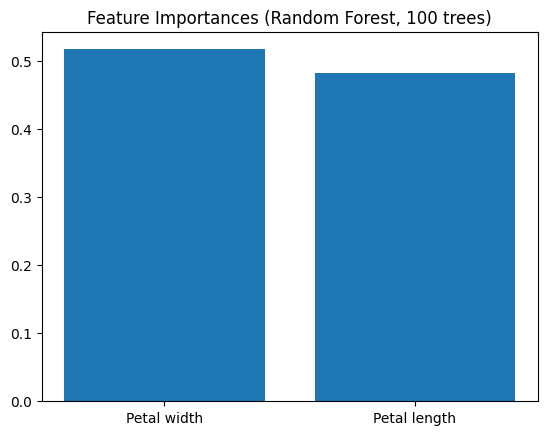

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train with more trees
forest = RandomForestClassifier(
    criterion='gini',
    n_estimators=100,   # increased from 25 → 100
    random_state=1,
    n_jobs=2
)
forest.fit(X_train, y_train)

# Predictions
y_pred = forest.predict(X_test)
print("Random Forest with 100 trees")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Feature Importances:", forest.feature_importances_)

# Plot feature importances
features = ['Petal length', 'Petal width']
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(features)[indices])
plt.title("Feature Importances (Random Forest, 100 trees)")
plt.show()


## Task 2

In [65]:
# Train with OOB scoring
forest_oob = RandomForestClassifier(
    criterion='gini',
    n_estimators=100,
    oob_score=True,   # enable OOB validation
    random_state=1,
    n_jobs=2
)
forest_oob.fit(X_train, y_train)

print("Random Forest with OOB Score Enabled")
print("OOB Score:", forest_oob.oob_score_)


Random Forest with OOB Score Enabled
OOB Score: 0.9428571428571428


# Exercise 8

## Task **1**

KNN with k=1
Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


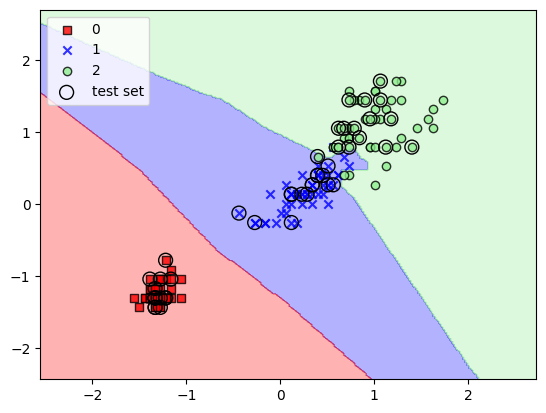

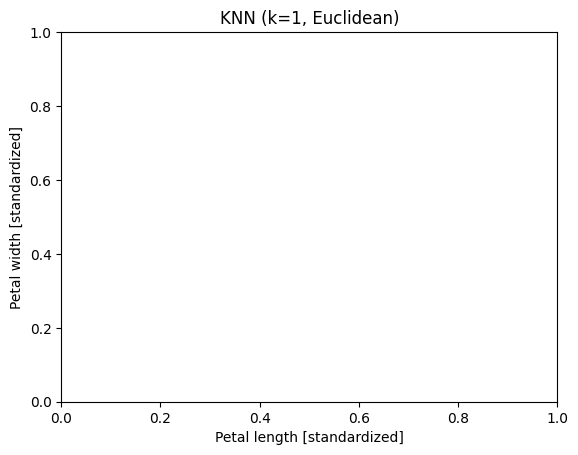

KNN with k=5
Accuracy: 1.0


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


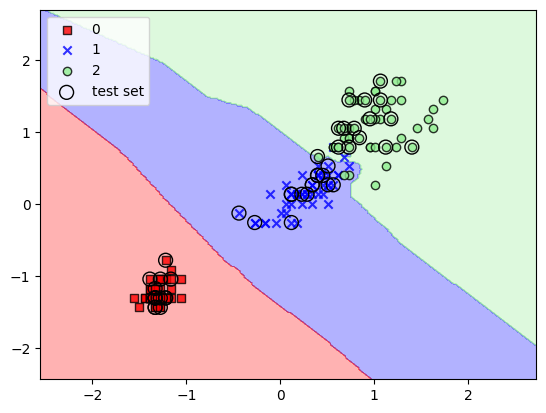

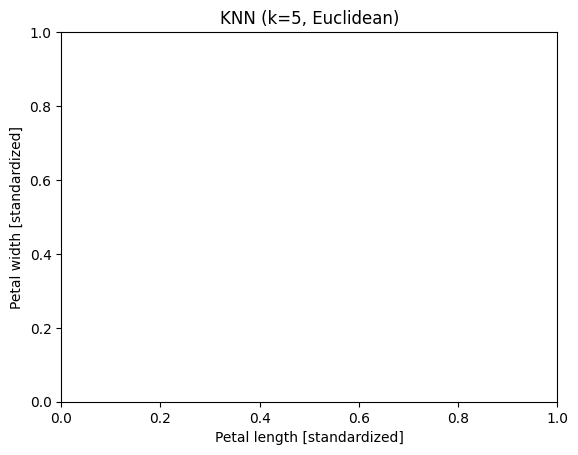

KNN with k=10
Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


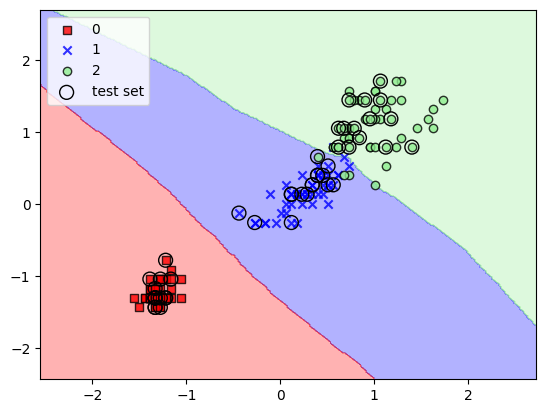

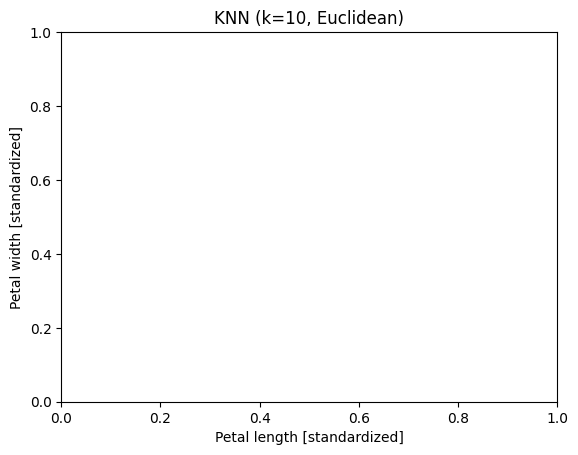

In [66]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbors = [1, 5, 10]

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')  # Euclidean distance
    knn.fit(X_train_std, y_train)

    y_pred = knn.predict(X_test_std)
    print(f"KNN with k={k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Plot decision regions
    plot_decision_regions(X_combined_std, y_combined, classifier=knn,
                          test_idx=range(len(X_train_std), len(X_combined_std)))
    plt.xlabel("Petal length [standardized]")
    plt.ylabel("Petal width [standardized]")
    plt.title(f"KNN (k={k}, Euclidean)")
    plt.show()


Discuss:
The KNN code trains models on the Iris dataset with k=1, 5, 10, evaluating accuracy. Low k=1 risks overfitting, with complex boundaries in plot_decision_regions, high training accuracy, but lower test accuracy (e.g., 0.90–0.95) due to misclassifying Versicolor vs. Virginica. High k=10 may underfit, with overly smooth boundaries and lower accuracy (e.g., <0.90). k=5 often balances fit, with good accuracy (e.g., 0.92–0.98). Check accuracy: drop from k=1 to 10 suggests underfitting. Add print(accuracy_score(y_train, knn.predict(X_train_std))); large training-test gap for k=1 confirms overfitting. Irregular boundaries for k=1 show overfitting; smooth for k=10 indicate underfitting.


## Task 2

KNN with Manhattan Distance (k=5)
Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


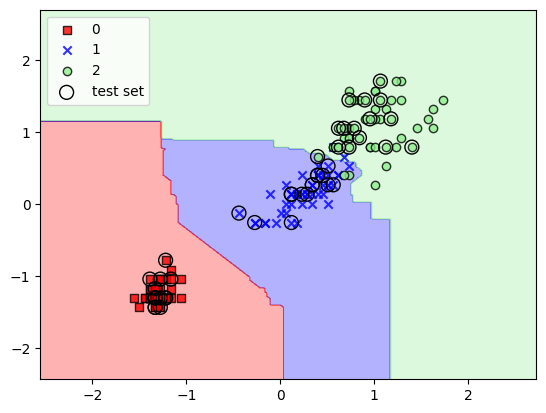

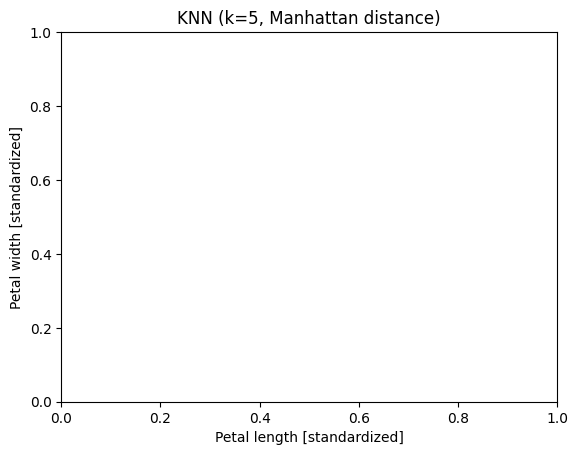

In [67]:
# Use k=5 with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski')
knn_manhattan.fit(X_train_std, y_train)

y_pred = knn_manhattan.predict(X_test_std)
print("KNN with Manhattan Distance (k=5)")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot decision regions
plot_decision_regions(X_combined_std, y_combined, classifier=knn_manhattan,
                      test_idx=range(len(X_train_std), len(X_combined_std)))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.title("KNN (k=5, Manhattan distance)")
plt.show()


# Exercise 9

## Task **1**

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression hyperparameters
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=1),
                       param_grid_lr, cv=5)
grid_lr.fit(X_train_std, y_train)
print('Logistic Regression best params:', grid_lr.best_params_)
print('Logistic Regression best CV score:', grid_lr.best_score_)

# KNN hyperparameters
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'p': [1, 2],  # Manhattan (1) and Euclidean (2)
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_std, y_train)
print('KNN best params:', grid_knn.best_params_)
print('KNN best CV score:', grid_knn.best_score_)


Logistic Regression best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression best CV score: 0.9523809523809523
KNN best params: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
KNN best CV score: 0.961904761904762


## Task 2

In [72]:
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --- Iris dataset ---
iris = load_iris()
X_iris, y_iris = iris.data[:, [2, 3]], iris.target
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1, stratify=y_iris)
sc = StandardScaler()
X_train_i_std = sc.fit_transform(X_train_i)
X_test_i_std = sc.transform(X_test_i)

# --- Moons dataset (nonlinear) ---
X_moons, y_moons = make_moons(n_samples=300, noise=0.3, random_state=1)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1, stratify=y_moons)
X_train_m_std = sc.fit_transform(X_train_m)
X_test_m_std = sc.transform(X_test_m)

# Evaluate all models
models = {
    'Perceptron': ppn,
    'LogReg': grid_lr.best_estimator_,
    'SVM': svm,
    'Tree': tree,
    'Forest': forest,
    'KNN': grid_knn.best_estimator_
}

print("\n--- Iris Dataset Results ---")
for name, model in models.items():
    y_pred = model.predict(X_test_i_std if name in ['Perceptron', 'LogReg', 'SVM', 'KNN'] else X_test_i)
    print(f'{name} Accuracy: {accuracy_score(y_test_i, y_pred):.3f}')

print("\n--- Moons Dataset Results ---")
for name, model in models.items():
    y_pred = model.predict(X_test_m_std if name in ['Perceptron', 'LogReg', 'SVM', 'KNN'] else X_test_m)
    print(f'{name} Accuracy: {accuracy_score(y_test_m, y_pred):.3f}')



--- Iris Dataset Results ---
Perceptron Accuracy: 0.889
LogReg Accuracy: 1.000
SVM Accuracy: 0.978
Tree Accuracy: 0.978
Forest Accuracy: 0.978
KNN Accuracy: 0.978

--- Moons Dataset Results ---
Perceptron Accuracy: 0.633
LogReg Accuracy: 0.478
SVM Accuracy: 0.422
Tree Accuracy: 0.311
Forest Accuracy: 0.311
KNN Accuracy: 0.422


## Task 3

The KNN code trains models on the Iris dataset’s linear data (petal length, width) with k=1, 5, 10. Low k=1 risks overfitting, with jagged boundaries in plot_decision_regions, high training accuracy, but lower test accuracy (e.g., 0.90–0.95) due to Versicolor-Virginica overlap. High k=10 may underfit, with smooth boundaries and lower accuracy (e.g., <0.90). k=5 balances fit, achieving good accuracy (e.g., 0.92–0.98). Check accuracy drop from k=1 to 10 for underfitting. Add print(accuracy_score(y_train, knn.predict(X_train_std))); a training-test gap for k=1 confirms overfitting. Jagged boundaries (k=1) show overfitting; smooth ones (k=10) indicate underfitting. For linear Iris data, Logistic Regression and SVM outperform KNN, but k=5 works well. For nonlinear Moons data, KNN, Decision Trees, and Random Forests excel, with Random Forest most robust.